# **Financial stock analysis using agentic**

In [43]:
import warnings
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
# Suppress all warnings
warnings.filterwarnings("ignore")

In [10]:
!pip install sec-edgar-downloader pandas tqdm transformers

**Stock Data**

In [ ]:


# Set date range for the last 3 years from today
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=3*365)).strftime('%Y-%m-%d')

# Download stock data for the S&P 500 index (as an example)
stock = yf.download("^GSPC", start=start_date, end=end_date)[["Open", "High", "Low", "Close", "Volume"]]  # Select only required columns

# Add Date column explicitly
stock.insert(0, "Date", stock.index)
stock.reset_index(drop=True, inplace=True)  # Reset index

# Sort data in descending order (latest date first)
stock = stock.sort_values(by="Date", ascending=False)

# Save data as CSV
stock.to_csv("stock_data_last_3_years6.csv", index=False)  # Save without index

print("Stock data saved as 'stock_data_last_3_years.csv' with latest data first.")


[*********************100%***********************]  1 of 1 completed

Stock data saved as 'stock_data_last_3_years.csv' with latest data first.


In [ ]:
!pip install sec-edgar-downloader pandas tqdm transformers


**Financial Reports From Edgar**

In [ ]:
import os
import pandas as pd
from tqdm import tqdm
from sec_edgar_downloader import Downloader

# Initialize downloader
dl = Downloader("MyCompany", "myemail@example.com")

# Top 10 companies (by market cap)
top_companies = {
    "AAPL": "Apple",
    "MSFT": "Microsoft",
    "GOOGL": "Alphabet (Google)",
    "AMZN": "Amazon",
    "TSLA": "Tesla",
    "META": "Meta (Facebook)",
    "NVDA": "NVIDIA",
    "BRK-B": "Berkshire Hathaway",
    "JPM": "JPMorgan Chase",
    "V": "Visa"
}

# Filing types to download
filing_types = ["8-K", "10-Q", "4"]

# Date range (last 3 years)
start_date = "2022-01-01"
end_date = "2025-01-01"

# Store results in a list
data = []

# Download filings for each company
for ticker, company_name in tqdm(top_companies.items(), desc="Downloading EDGAR Filings"):
    for filing in filing_types:
        dl.get(filing, ticker, after=start_date, before=end_date)

        # Directory where reports are saved
        reports_path = f"sec-edgar-filings/{ticker}/{filing}/"

        if os.path.exists(reports_path):
            for report in os.listdir(reports_path):
                report_path = os.path.join(reports_path, report)
                filing_date = report.split("_")[0]  # Extract date from filename

                data.append([company_name, ticker, filing, filing_date, report_path])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Company Name", "Ticker", "Filing Type", "Filing Date", "File Path"])

# Save as CSV
df.to_csv("Top_10_Companies_EDGAR_Reports.csv", index=False)
print("✅ EDGAR data saved as 'Top_10_Companies_EDGAR_Reports.csv'")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu

✅ EDGAR data with summaries saved as 'Top_10_Companies_EDGAR_Reports_Summary.csv'


**Dataset Overview**

In [100]:
# Import necessary libraries for deep learning with PyTorch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

In [101]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv('/content/Top_10_Companies_EDGAR_Reports_processed (1) (1).csv')
df2 = pd.read_csv('/content/stock_data_last_3_years6 (1) (1).csv')



In [102]:
# Display information and first five rows of each dataset
print("Dataset 1: Top 10 Companies EDGAR Reports")
df1.info()

Dataset 1: Top 10 Companies EDGAR Reports
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3304 entries, 0 to 3303
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  3304 non-null   object
 1   Ticker        3304 non-null   object
 2   Filing Type   3304 non-null   object
 3   Filing Date   3304 non-null   object
 4   File Path     3304 non-null   object
dtypes: object(5)
memory usage: 129.2+ KB


In [103]:
df1.head()

,Company Name,Ticker,Filing Type,Filing Date,File Path
0,Apple,AAPL,8-K,2023-08-24,sec-edgar-filings/AAPL/8-K/0001140361-24-038601
1,Apple,AAPL,8-K,2025-01-21,sec-edgar-filings/AAPL/8-K/0000320193-23-000005
2,Apple,AAPL,8-K,2022-10-04,sec-edgar-filings/AAPL/8-K/0001140361-24-024352
3,Apple,AAPL,8-K,2024-03-30,sec-edgar-filings/AAPL/8-K/0000320193-23-000104
4,Apple,AAPL,8-K,2022-12-11,sec-edgar-filings/AAPL/8-K/0000320193-22-000069


In [104]:
print("\nDataset 2: Stock Data Last 3 Years")
df2.info()


Dataset 2: Stock Data Last 3 Years
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    751 non-null    object 
 1   Open    751 non-null    float64
 2   High    751 non-null    float64
 3   Low     751 non-null    float64
 4   Close   751 non-null    float64
 5   Volume  751 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 35.3+ KB


In [105]:
df2.head()

,Date,Open,High,Low,Close,Volume
0,3/28/2025,5679.200195,5685.890137,5572.419922,5580.939941,4513330000
1,3/27/2025,5695.640137,5732.279785,5670.939941,5693.310059,4403460000
2,3/26/2025,5771.660156,5783.620117,5694.410156,5712.200195,4183140000
3,3/25/2025,5775.959961,5786.950195,5760.419922,5776.649902,4467340000
4,3/24/2025,5718.080078,5775.140137,5718.080078,5767.569824,4517990000


**Merging the Dataset**

In [106]:
import pandas as pd

# Step 1: Convert to datetime and normalize (removes time part)
df1['Filing Date'] = pd.to_datetime(df1['Filing Date']).dt.normalize()
df2['Date'] = pd.to_datetime(df2['Date']).dt.normalize()

# Step 2: Merge on date
merged_df = pd.merge(df1, df2, left_on='Filing Date', right_on='Date', how='inner')

# Step 3: Define columns
numeric_cols = ["Open", "High", "Low", "Close", "Volume"]
non_numeric_cols = ["Company Name", "Ticker", "Filing Type", "File Path"]

# Step 4: Drop rows with missing Filing Date or numeric values (optional)
merged_df = merged_df.dropna(subset=["Filing Date"] + numeric_cols)

# Step 5: Group and aggregate
merged_df = merged_df.groupby("Filing Date").agg({
    **{col: "mean" for col in numeric_cols},
    **{col: "first" for col in non_numeric_cols}
}).reset_index()

# Step 6: Debug output
print("Merged and aggregated DataFrame shape:", merged_df.shape)


Merged and aggregated DataFrame shape: (712, 10)


In [107]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Filing Date   712 non-null    datetime64[ns]
 1   Open          712 non-null    float64       
 2   High          712 non-null    float64       
 3   Low           712 non-null    float64       
 4   Close         712 non-null    float64       
 5   Volume        712 non-null    float64       
 6   Company Name  712 non-null    object        
 7   Ticker        712 non-null    object        
 8   Filing Type   712 non-null    object        
 9   File Path     712 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 55.8+ KB


In [108]:
# Display the first few rows of merged dataset
merged_df.head()

,Filing Date,Open,High,Low,Close,Volume,Company Name,Ticker,Filing Type,File Path
0,2022-03-31,4599.020020,4603.069824,4530.410156,4530.410156,4.823020e+09,Alphabet (Google),GOOGL,4,sec-edgar-filings/GOOGL/4/0001209191-23-032529
1,2022-04-01,4540.319824,4548.700195,4507.569824,4545.859863,4.562940e+09,Meta (Facebook),META,4,sec-edgar-filings/META/4/0000950103-22-005137
2,2022-04-04,4547.970215,4583.500000,4539.209961,4582.640137,4.547350e+09,Apple,AAPL,10-Q,sec-edgar-filings/AAPL/10-Q/0000320193-24-000006
3,2022-04-05,4572.450195,4593.450195,4514.169922,4525.120117,4.800620e+09,Tesla,TSLA,4,sec-edgar-filings/TSLA/4/0001790565-22-000006
4,2022-04-06,4494.169922,4503.939941,4450.040039,4481.149902,4.986830e+09,Alphabet (Google),GOOGL,4,sec-edgar-filings/GOOGL/4/0001209191-23-050698


**Data Cleaning and Preprocessing**

In [109]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Filing Date     0
Open            0
High            0
Low             0
Close           0
Volume          0
Company Name    0
Ticker          0
Filing Type     0
File Path       0
dtype: int64


In [110]:
# Check for duplicate rows
duplicate_rows = merged_df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

# Drop duplicates if any
merged_df.drop_duplicates(inplace=True)

# Drop rows with missing values if any
merged_df.dropna(inplace=True)


Number of Duplicate Rows: 0


In [111]:
# Summary statistics
print("\n Summary Statistics:")
merged_df.describe()



 Summary Statistics:


,Filing Date,Open,High,Low,Close,Volume
count,712,712.000000,712.000000,712.000000,712.000000,7.120000e+02
mean,2023-09-27 23:57:58.651685376,4720.139273,4746.257053,4691.898645,4719.906126,4.170745e+09
min,2022-03-31 00:00:00,3590.830078,3608.340088,3568.449951,3577.030029,1.639500e+09
25%,2022-12-29 18:00:00,4084.464966,4123.014771,4060.007507,4090.019959,3.676705e+09
50%,2023-09-26 12:00:00,4488.474853,4503.625000,4458.445069,4484.304931,4.006515e+09
75%,2024-06-28 18:00:00,5435.734986,5474.237427,5404.552490,5433.912720,4.468590e+09
max,2025-03-25 00:00:00,6134.500000,6147.430176,6111.149902,6144.149902,9.367460e+09
std,NaN,748.295023,746.276768,748.816749,747.858193,8.576329e+08


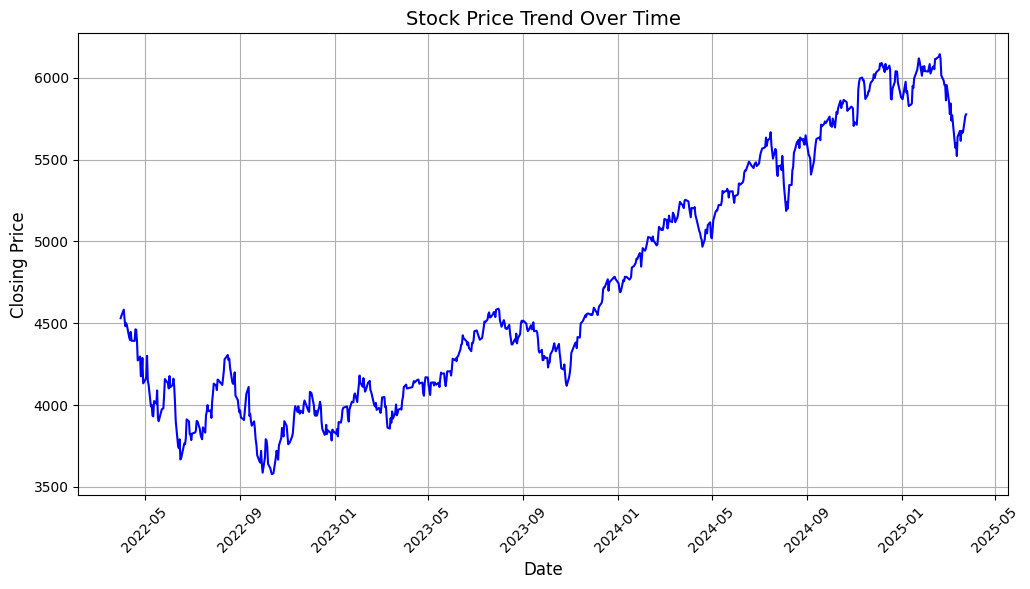

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(merged_df["Filing Date"], merged_df["Close"],  linestyle="-", color="blue")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.title("Stock Price Trend Over Time", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()


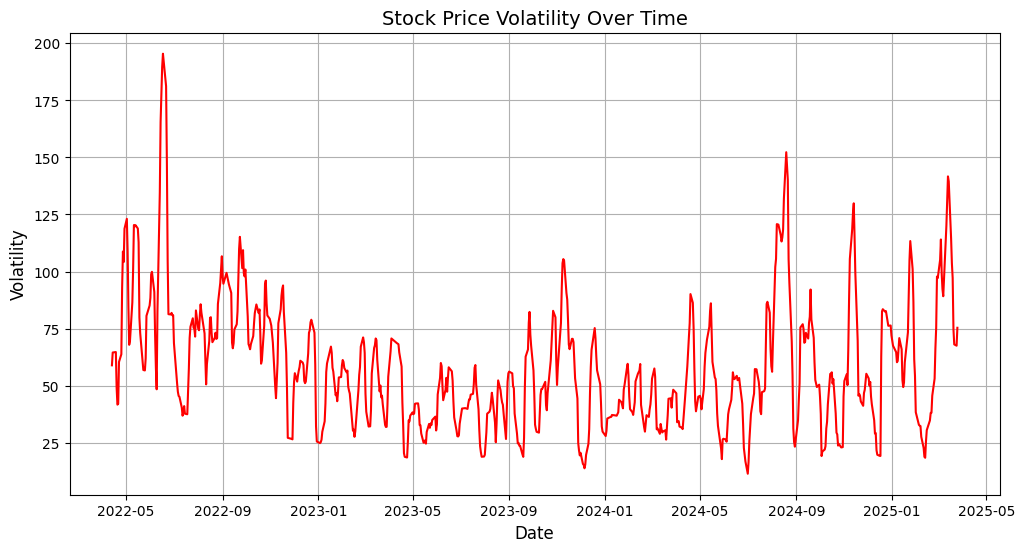

In [113]:
# Calculate volatility (rolling standard deviation)
merged_df['Volatility'] = merged_df['Close'].rolling(window=10).std()

# Plot volatility trends
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Filing Date'], merged_df['Volatility'], color='red')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volatility", fontsize=12)
plt.title("Stock Price Volatility Over Time", fontsize=14)
plt.grid()
plt.show()


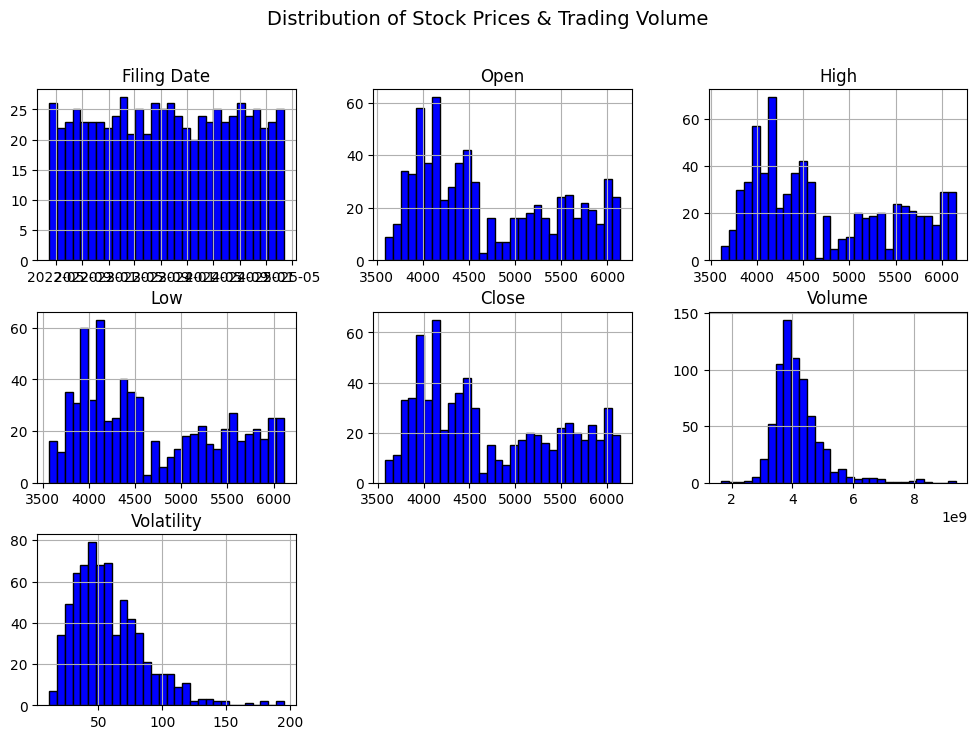

In [114]:
import matplotlib.pyplot as plt

# Plot distribution of numerical features
merged_df.hist(figsize=(12, 8), bins=30, edgecolor='black', color='blue')
plt.suptitle("Distribution of Stock Prices & Trading Volume", fontsize=14)
plt.show()


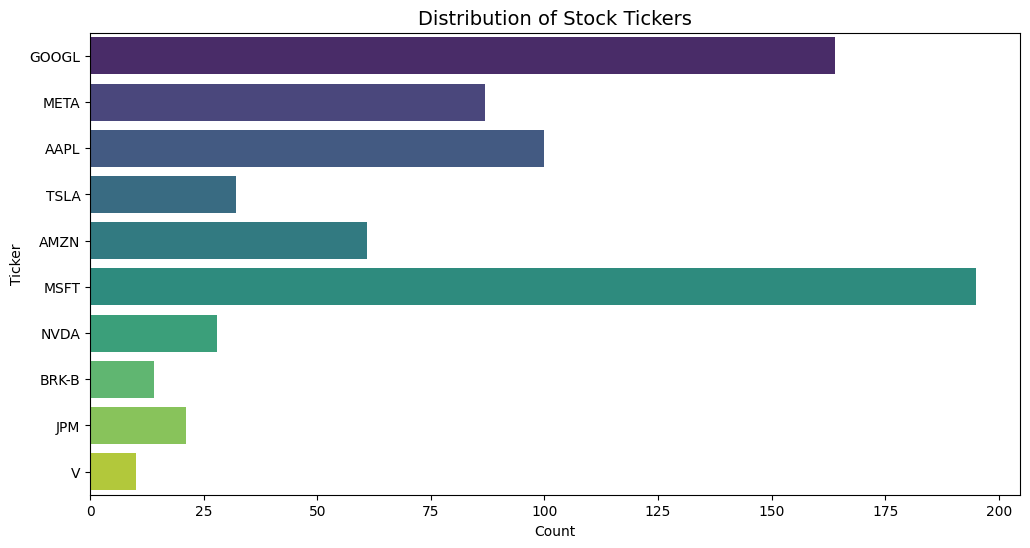

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for Ticker Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=merged_df['Ticker'], palette="viridis")
plt.title("Distribution of Stock Tickers", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Ticker")
plt.show()


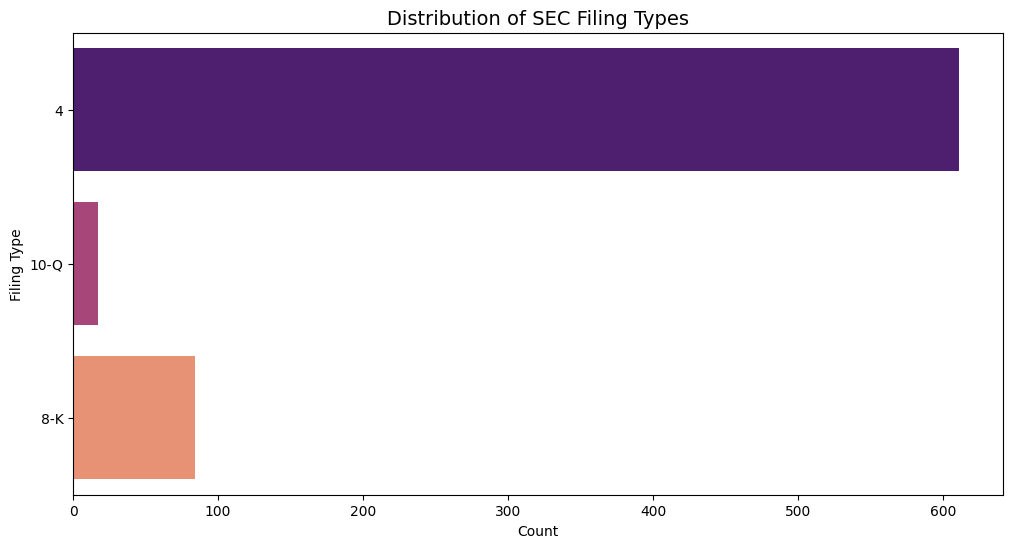

In [116]:
# Countplot for Filing Type Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=merged_df['Filing Type'], palette="magma")
plt.title("Distribution of SEC Filing Types", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Filing Type")
plt.show()


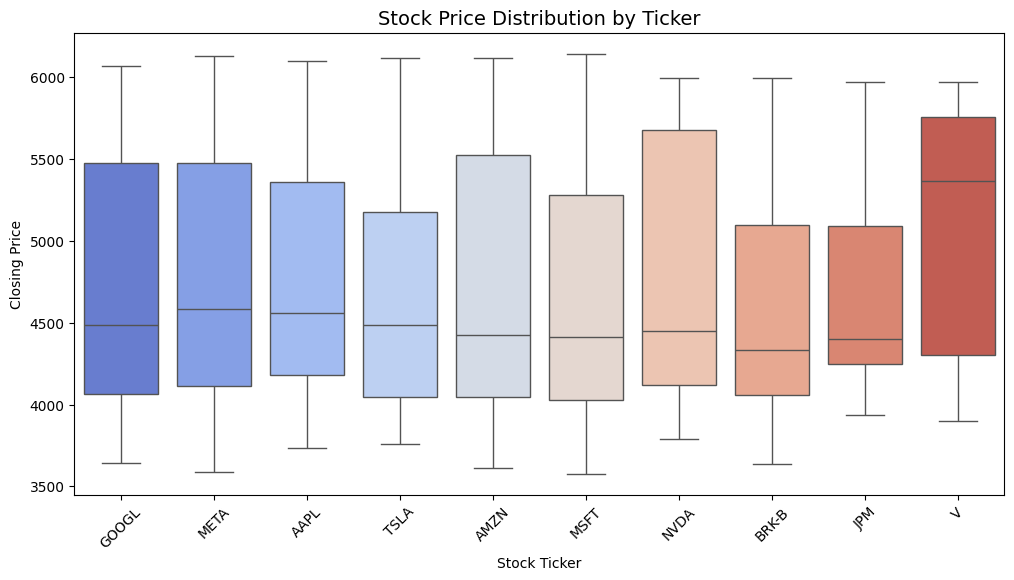

In [117]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Ticker", y="Close", data=merged_df, palette="coolwarm")
plt.title("Stock Price Distribution by Ticker", fontsize=14)
plt.xlabel("Stock Ticker")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.show()



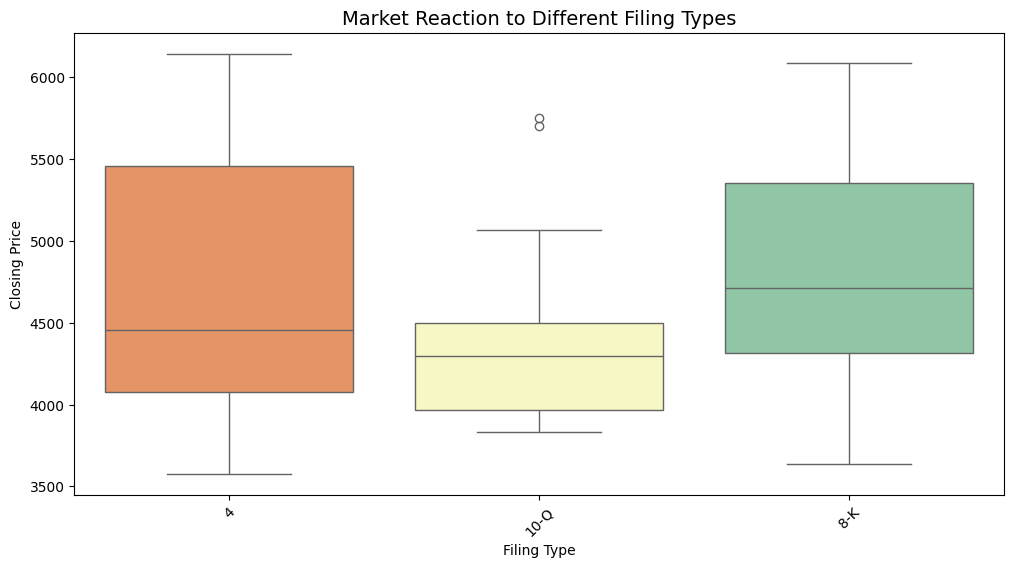

In [118]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Filing Type", y="Close", data=merged_df, palette="Spectral")
plt.title("Market Reaction to Different Filing Types", fontsize=14)
plt.xlabel("Filing Type")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.show()


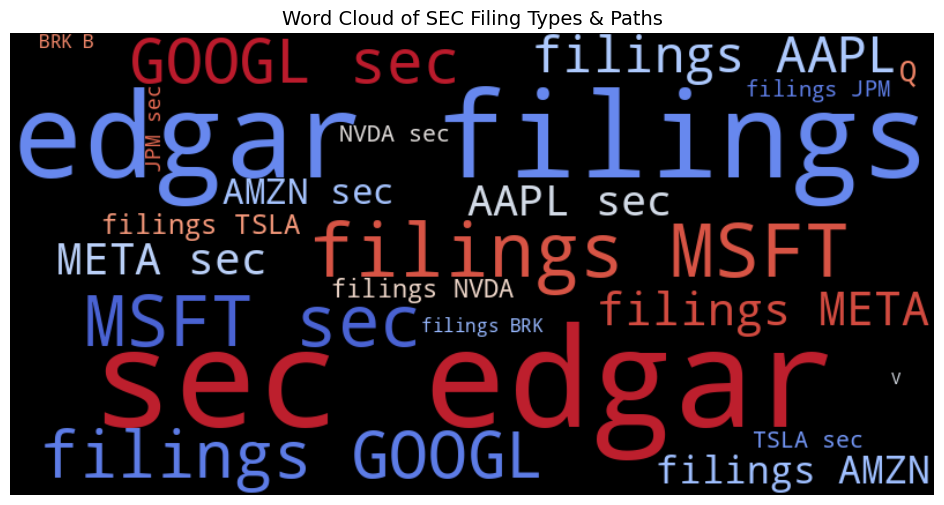

In [119]:
from wordcloud import WordCloud

# Combine all text data from 'Filing Type' and 'File Path'
text_data = " ".join(merged_df['Filing Type']) + " " + " ".join(merged_df['File Path'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="coolwarm").generate(text_data)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of SEC Filing Types & Paths", fontsize=14)
plt.show()


**Feature Engineering**

In [120]:
# Feature Engineering (same as before for consistency)
merged_df['Close_Lag1'] = merged_df['Close'].shift(1)
merged_df['Close_Lag2'] = merged_df['Close'].shift(2)
merged_df['Close_Rolling_Mean'] = merged_df['Close'].rolling(window=5).mean()
merged_df['Volatility'] = merged_df['Close'].rolling(window=10).std()

# Encode categorical variables
le_company = LabelEncoder()
le_ticker = LabelEncoder()
le_filing_type = LabelEncoder()

merged_df['Company_Name_Encoded'] = le_company.fit_transform(merged_df['Company Name'])
merged_df['Ticker_Encoded'] = le_ticker.fit_transform(merged_df['Ticker'])
merged_df['Filing_Type_Encoded'] = le_filing_type.fit_transform(merged_df['Filing Type'])
merged_df['File_Path_Length'] = merged_df['File Path'].apply(len)

# Drop rows with NaN values
merged_df.dropna(inplace=True)

**Define Features and Normalize Data**

In [121]:
# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'Close_Lag1', 'Close_Lag2',
            'Close_Rolling_Mean', 'Volatility', 'Company_Name_Encoded',
            'Ticker_Encoded', 'Filing_Type_Encoded', 'File_Path_Length']
target = 'Close'

# Extract X and y
X = merged_df[features].values
y = merged_df[target].values

# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [122]:
# Function to create sequences for LSTM
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Set time steps
time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Split into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

In [123]:
# Define the LSTM model class
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size

        # Define three separate LSTM layers (each with 1 layer)
        self.lstm1 = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.dropout2 = nn.Dropout(0.2)
        self.lstm3 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.dropout3 = nn.Dropout(0.2)
        self.fc1 = nn.Linear(hidden_size, 128)  # Additional dense layer
        self.relu1 = nn.ReLU()
        self.dropout4 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)  # Another dense layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, output_size)  # Output layer

    def forward(self, x):
        # Initialize hidden state for each LSTM (1 layer each)
        h0_1 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)  # For lstm1
        c0_1 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)  # For lstm1

        h0_2 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)  # For lstm2
        c0_2 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)  # For lstm2

        h0_3 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)  # For lstm3
        c0_3 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)  # For lstm3

        # Forward propagate through each LSTM
        out, (h1, c1) = self.lstm1(x, (h0_1, c0_1))
        out = self.dropout1(out)
        out, (h2, c2) = self.lstm2(out, (h0_2, c0_2))
        out = self.dropout2(out)
        out, (h3, c3) = self.lstm3(out, (h0_3, c0_3))
        out = self.dropout3(out)
        out = out[:, -1, :]  # Take the last output
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.dropout4(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Initialize the model
input_size = X_train.shape[2]  # Number of features
hidden_size = 64
output_size = 1  # Predicting one value (Close price)

model = LSTMModel(input_size, hidden_size, output_size)

# Print model structure
print(model)

LSTMModel(
  (lstm1): LSTM(12, 64, batch_first=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (lstm2): LSTM(64, 64, batch_first=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (lstm3): LSTM(64, 64, batch_first=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (relu1): ReLU()
  (dropout4): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)


In [124]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
batch_size = 32

# Create data loaders
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)

# Lists to store losses and errors
train_losses = []
val_losses = []
train_maes = []  # Track MAE for training
val_maes = []    # Track MAE for validation

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_mae = 0.0
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Calculate MAE
        mae = torch.mean(torch.abs(outputs - targets))

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_mae += mae.item()

    # Calculate average training loss and MAE
    epoch_loss = running_loss / len(train_loader)
    epoch_mae = running_mae / len(train_loader)
    train_losses.append(epoch_loss)
    train_maes.append(epoch_mae)

    # Validation loss and MAE (on training set for simplicity)
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_train_tensor.to(device))
        val_loss = criterion(val_outputs, y_train_tensor.to(device))
        val_mae = torch.mean(torch.abs(val_outputs - y_train_tensor.to(device))).item()
        val_losses.append(val_loss.item())
        val_maes.append(val_mae)

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}, Training MAE: {epoch_mae:.4f}, Validation MAE: {val_mae:.4f}')



Epoch [1/100], Training Loss: 0.0155, Validation Loss: 0.3010, Training MAE: 0.1040, Validation MAE: 0.5201
Epoch [2/100], Training Loss: 0.1519, Validation Loss: 0.0624, Training MAE: 0.3296, Validation MAE: 0.1822
Epoch [3/100], Training Loss: 0.0660, Validation Loss: 0.0531, Training MAE: 0.1894, Validation MAE: 0.1744
Epoch [4/100], Training Loss: 0.0478, Validation Loss: 0.0432, Training MAE: 0.1715, Validation MAE: 0.1737
Epoch [5/100], Training Loss: 0.0470, Validation Loss: 0.0386, Training MAE: 0.1863, Validation MAE: 0.1716
Epoch [6/100], Training Loss: 0.0389, Validation Loss: 0.0188, Training MAE: 0.1756, Validation MAE: 0.1186
Epoch [7/100], Training Loss: 0.0207, Validation Loss: 0.0137, Training MAE: 0.1241, Validation MAE: 0.0944
Epoch [8/100], Training Loss: 0.0110, Validation Loss: 0.0057, Training MAE: 0.0871, Validation MAE: 0.0611
Epoch [9/100], Training Loss: 0.0066, Validation Loss: 0.0047, Training MAE: 0.0662, Validation MAE: 0.0549
Epoch [10/100], Training Los

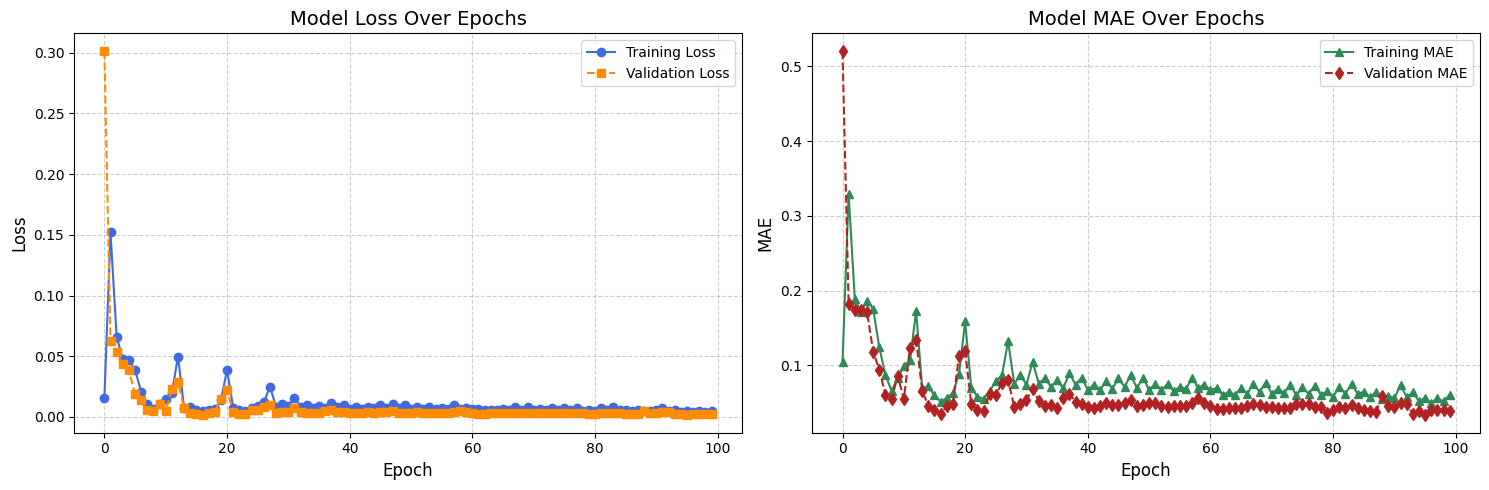

In [125]:
# Plot training and validation metrics
plt.figure(figsize=(15, 5))

# Plot 1: Losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='royalblue', linestyle='-', marker='o')
plt.plot(val_losses, label='Validation Loss', color='darkorange', linestyle='--', marker='s')
plt.title('Model Loss Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 2: MAEs
plt.subplot(1, 2, 2)
plt.plot(train_maes, label='Training MAE', color='seagreen', linestyle='-', marker='^')
plt.plot(val_maes, label='Validation MAE', color='firebrick', linestyle='--', marker='d')
plt.title('Model MAE Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [126]:
# Make predictions
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_pred_scaled = model(X_test_tensor).cpu().numpy()

# Inverse transform predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Mean Absolute Error (MAE): 364.68
Root Mean Squared Error (RMSE): 390.41


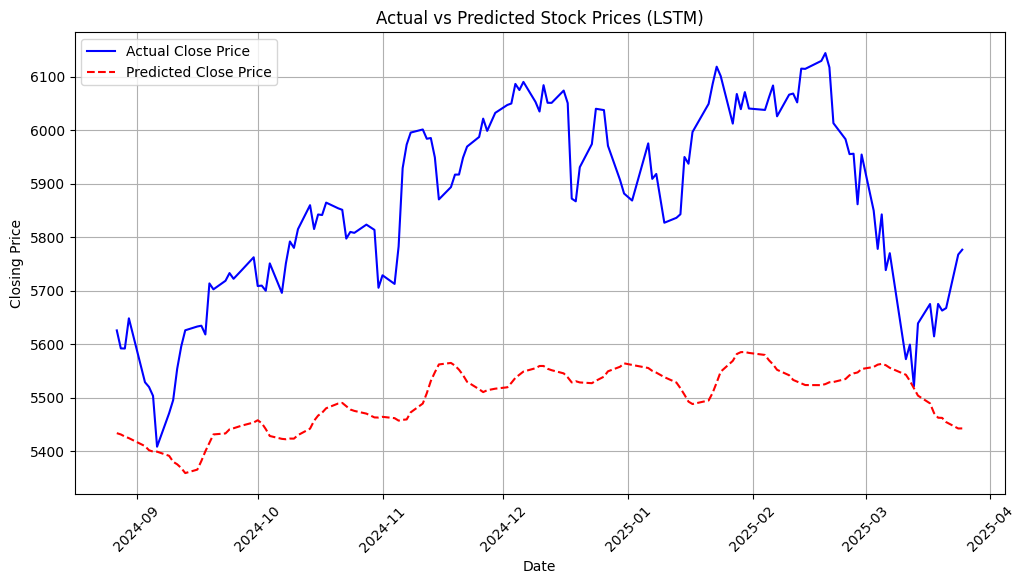

In [127]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Filing Date'].iloc[train_size + time_steps:], y_test_actual, label='Actual Close Price', color='blue')
plt.plot(merged_df['Filing Date'].iloc[train_size + time_steps:], y_pred, label='Predicted Close Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Stock Prices (LSTM)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()